<a href="https://colab.research.google.com/github/daeunkk/dl11/blob/main/notebook/ch08_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch08: DNN, 심층신경망

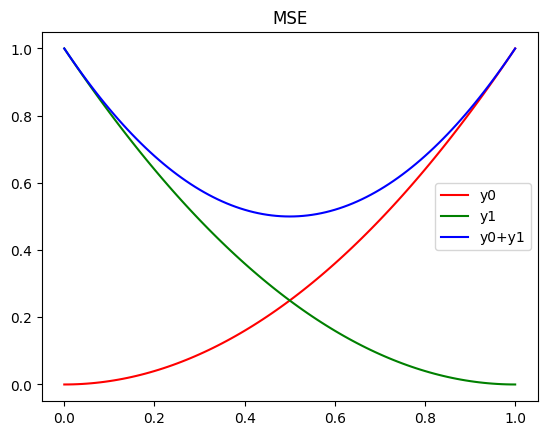

<ipython-input-1-dc45002fc0e2>:22: RuntimeWarning: divide by zero encountered in log
  y0 = -np.log(1-x)
<ipython-input-1-dc45002fc0e2>:23: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)


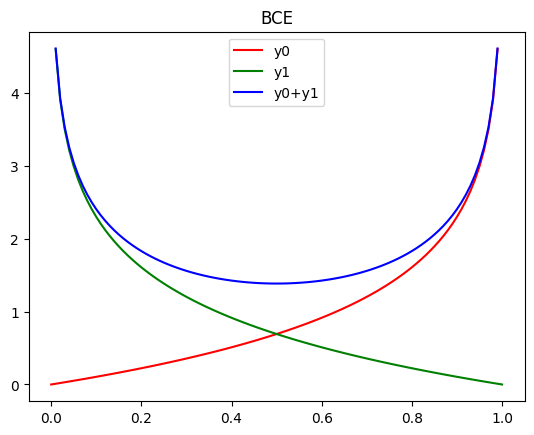

In [1]:
# 손실함수
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.legend(['y0','y1','y0+y1'])
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.legend(['y0','y1','y0+y1'])
plt.show() 

## 손실함수
- BCE
- CCE (sCCE)
- MSE

In [2]:
# import numpy as np
import tensorflow as tf

# BinaryCrossentropy
y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.8], [0.3], [0.5], [0.9]]   
# y_pred = [[1.0], [0.3], [0.5], [1.0]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CategoricalCrossentropy
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())      

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )

import numpy as np
custom_loss_function(np.array(y_true), np.array(y_pred)).numpy()


0.3445814
1.936381
9


9

In [3]:
# SparseCategoricalCrossentropy
y_true = [1,2,0] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
scce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(scce(y_true, y_pred).numpy ())     

1.936381


Encoding
- int incoding
- one-hot encoding

In [4]:
import numpy as np
X = np.array([['Korea', 44, 7200],
		      ['Japan', 27, 4800],
	          ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
print(X)


[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [5]:
# OneHotEncoder
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX, X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


## One-hot encoding using Keras

In [6]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


In [7]:
#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

print(y_train[:10])

y_train_one_hot = to_categorical(y_train, num_classes = 10) #, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]
# y_train[:10]


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 데이터 정규화
- minmax
- standard

In [8]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Normalization layer

In [9]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## Overfitting 처리 : IMDB 데이터 사용


In [10]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)




17464789/17464789 [==============================] - 0s 0us/step


In [11]:
print(len(train_data[0]),np.unique(train_data[0]).size)
# max(train_data.max())
print(train_data.shape,train_labels.shape)
train_labels[:10]

218 97
(25000,) (25000,)


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [12]:
train_data[0],max(train_data.max())

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  2,
  2,
  65,
  458,
  2,
  66,
  2,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  2,
  2,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2,
  19,
  14,
  22,
  4,
  2,
  2,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  2,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2,
  2,
  16,
  480,
  66,
  2,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  2,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  2,
  15,
  256,
  4,
  2,
  7,
  2,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  2,
  13,
  104,
  88,
  4,
  381,
  15,
  297,
  98,
  3

Epoch 1/20
49/49 [==============================] - 3s 27ms/step - loss: 0.6161 - accuracy: 0.6715 - val_loss: 0.4693 - val_accuracy: 0.8008
Epoch 2/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3840 - accuracy: 0.8357 - val_loss: 0.3463 - val_accuracy: 0.8526
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3237 - accuracy: 0.8648 - val_loss: 0.3314 - val_accuracy: 0.8593
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3080 - accuracy: 0.8728 - val_loss: 0.3302 - val_accuracy: 0.8592
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3010 - accuracy: 0.8762 - val_loss: 0.3290 - val_accuracy: 0.8586
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 0.2943 - accuracy: 0.8780 - val_loss: 0.3283 - val_accuracy: 0.8592
Epoch 7/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2910 - accuracy: 0.8802 - val_loss: 0.3296 - val_accuracy: 0.8600
Epoch 8/20
49/49 [=

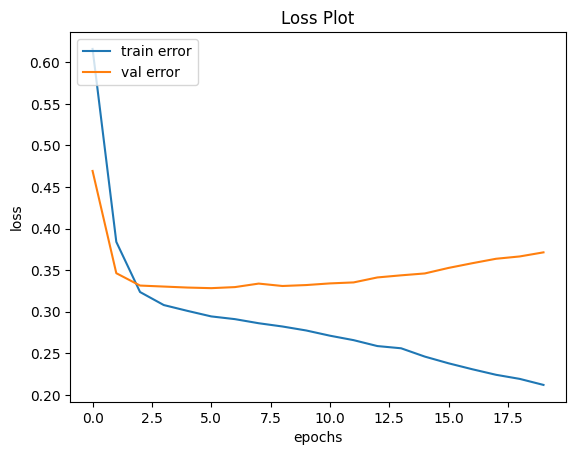

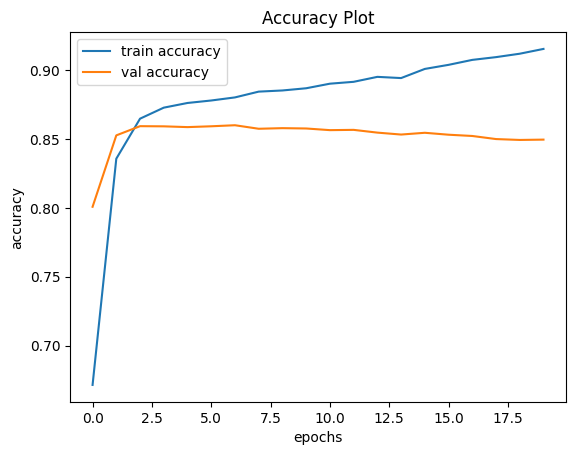

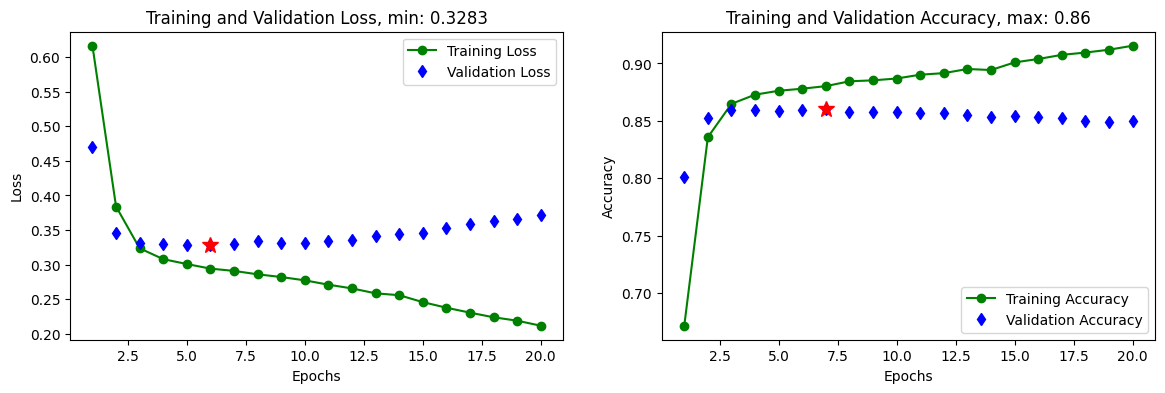

In [13]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# train_data.shape,test_data.shape
# train_data[0].shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 가중치 규제
- L1
- L2

Epoch 1/20
49/49 - 2s - loss: 0.5956 - accuracy: 0.7238 - val_loss: 0.4430 - val_accuracy: 0.8338 - 2s/epoch - 37ms/step
Epoch 2/20
49/49 - 1s - loss: 0.3961 - accuracy: 0.8540 - val_loss: 0.3814 - val_accuracy: 0.8583 - 704ms/epoch - 14ms/step
Epoch 3/20
49/49 - 1s - loss: 0.3593 - accuracy: 0.8708 - val_loss: 0.3710 - val_accuracy: 0.8608 - 752ms/epoch - 15ms/step
Epoch 4/20
49/49 - 1s - loss: 0.3475 - accuracy: 0.8716 - val_loss: 0.3673 - val_accuracy: 0.8614 - 595ms/epoch - 12ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3417 - accuracy: 0.8756 - val_loss: 0.3692 - val_accuracy: 0.8586 - 638ms/epoch - 13ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3401 - accuracy: 0.8738 - val_loss: 0.3673 - val_accuracy: 0.8578 - 462ms/epoch - 9ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3365 - accuracy: 0.8748 - val_loss: 0.3663 - val_accuracy: 0.8594 - 377ms/epoch - 8ms/step
Epoch 8/20
49/49 - 1s - loss: 0.3309 - accuracy: 0.8756 - val_loss: 0.3621 - val_accuracy: 0.8593 - 532ms/epoch - 11ms/step
Epoch 9/20
49

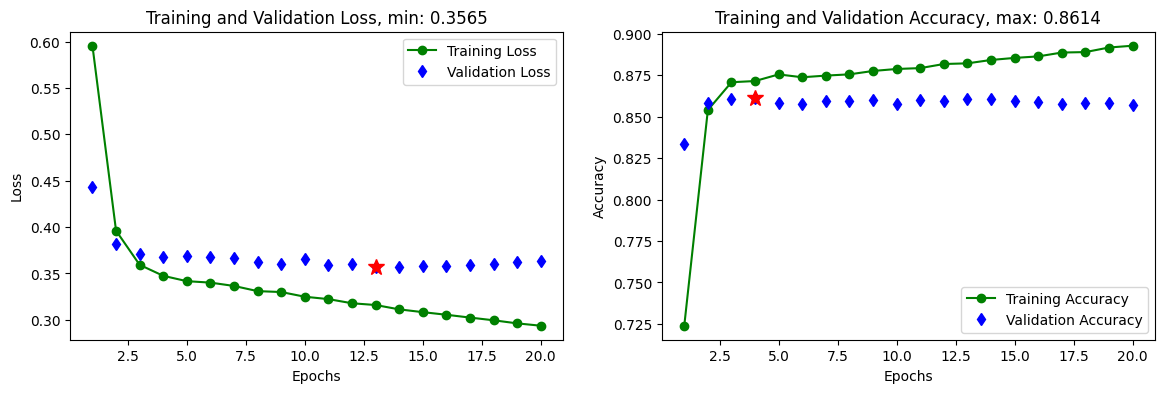

In [14]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Dropout

Epoch 1/20
49/49 - 2s - loss: 0.6808 - accuracy: 0.5501 - val_loss: 0.6183 - val_accuracy: 0.7363 - 2s/epoch - 31ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5958 - accuracy: 0.6722 - val_loss: 0.4822 - val_accuracy: 0.8179 - 332ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5018 - accuracy: 0.7581 - val_loss: 0.4047 - val_accuracy: 0.8448 - 383ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4481 - accuracy: 0.8005 - val_loss: 0.3635 - val_accuracy: 0.8510 - 336ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4148 - accuracy: 0.8244 - val_loss: 0.3373 - val_accuracy: 0.8571 - 385ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3862 - accuracy: 0.8401 - val_loss: 0.3269 - val_accuracy: 0.8590 - 402ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3729 - accuracy: 0.8460 - val_loss: 0.3249 - val_accuracy: 0.8604 - 366ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3570 - accuracy: 0.8550 - val_loss: 0.3225 - val_accuracy: 0.8606 - 381ms/epoch - 8ms/step
Epoch 9/20
49/49 -

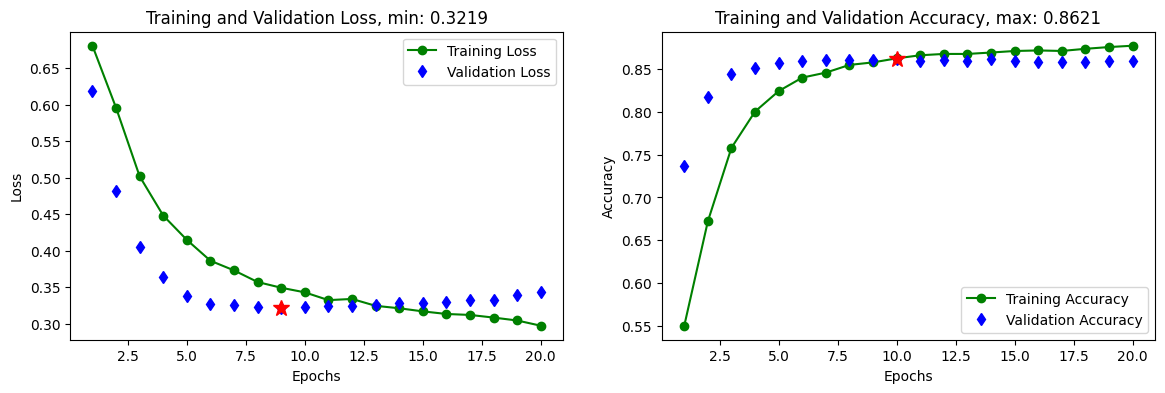

In [15]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DNN 응용의 예
- MNIST
- Fashion MNIST
- Titanic survival prediction


(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2176 - accuracy: 0.9355 - val_loss: 0.1060 - val_accuracy: 0.9670
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0953 - accuracy: 0.9707 - val_loss: 0.0720 - val_accuracy: 0.9787
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0676 - accuracy: 0.9786 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0527 - accuracy: 0.9831 - val_loss: 0.0606 - val_accuracy: 0.9809
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0432 - accuracy: 0.9855 - val_loss: 0.0615 - val_accuracy: 0.9819
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0606 - val_accuracy: 0.9828
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0309 - accuracy: 0.9900

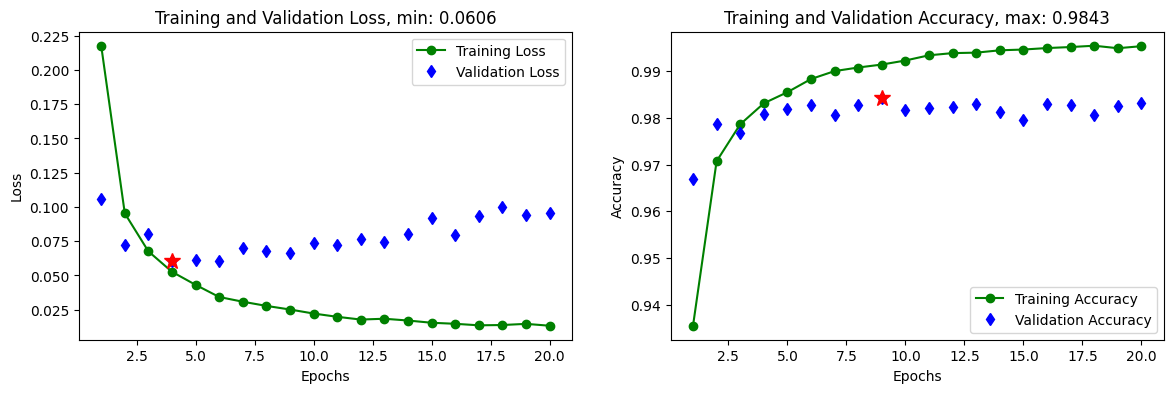

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### Fashion MNIST

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5035 - accuracy: 0.8234 - val_loss: 0.4236 - val_accuracy: 0.8492
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8625 - val_loss: 0.3952 - val_accuracy: 0.8582
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3392 - accuracy: 0.8768 - val_loss: 0.3841 - val_accuracy: 0.8599
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3153 - accuracy: 0.8845 - val_loss: 0.3679 - val_accuracy: 0.8695
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2989 - accuracy: 0.8906 - val_loss: 0.3590 - val_accuracy: 0.8695
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2802 - accuracy: 0.8966 - val_loss: 0.3536 - val_accuracy: 0.8734
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - lo

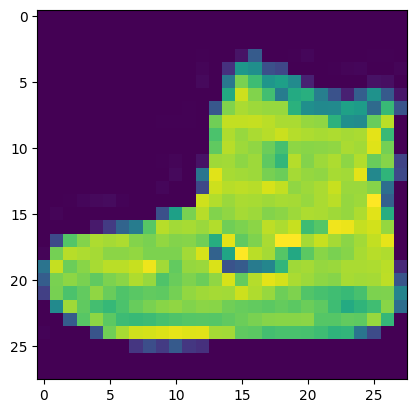

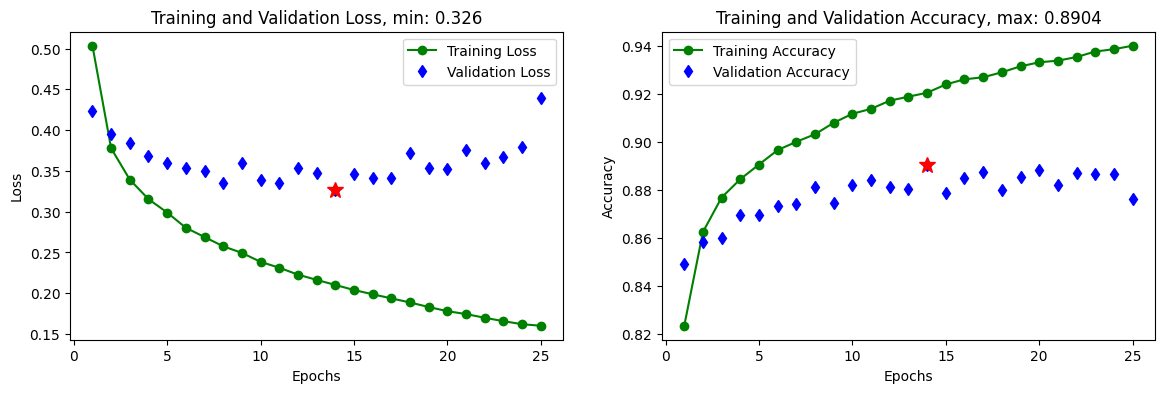

In [17]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# print(train_images.shape,train_labels.shape)
# print(train_labels[:10])

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 타이타닉 생존 예측

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')
# print(train.shape)
# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
# print(train.shape)
# train.head()
train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)
train.shape
# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

train.head()
# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 
target.shape
# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 
train.shape
train.head()
# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)



FileNotFoundError: ignored

In [20]:
test.shape, test.columns

NameError: ignored

In [ ]:
######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다. 
test = pd.read_csv("test.csv", sep=',')

test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
test.isna().sum()
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)
# Survival
print(np.where(pred_test >= 0.5)[0].size)  # 152
# Dead
print(np.where(pred_test < 0.5)[0].size)   # 266
